<a href="https://colab.research.google.com/github/juanninocruz/Estadistica/blob/main/Cuaderno16_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descripción del conjunto de datos**


El conjunto de datos proviene de una tienda online que contiene información sobre los clientes. Las columnas importantes en el conjunto de datos son:
* ID: identificador único del cliente.
* Genero: sexo del cliente (Male/Female).
* Edad: edad del cliente.
* Ciudad: ciudad de residencia del cliente.
* Ingresos: ingresos anuales del cliente.
* Credito: calificación de crédito del cliente.
* Gastos: monto gastado por el cliente en la tienda.
* Trabajo: tipo de trabajo (por ejemplo, 1: oficina, 2: servicio, etc.).

**Metodología del taller**


* Cargar y preprocesar los datos.
* Cargar el conjunto de datos en un DataFrame. Realizar el preprocesamiento de los datos, como la codificación de variables categóricas y la normalización de los datos numéricos.
* Aplicar el algoritmo K-means.
* Determinar el número de clústeres adecuado. Aplicar el algoritmo K-means para
segmentar los datos en grupos. Evaluación de los resultados.
* Visualizar los clústeres obtenidos para observar cómo se distribuyen los clientes. Evaluar el rendimiento utilizando métricas como la inercia o el codo de K-means. Interpretar los resultados.
* Analizar las características de cada grupo para entender los perfiles de los clientes en cada
clúster.

**Cargar y Preprocesar los Datos**


Este bloque de código realiza una serie de pasos fundamentales para cargar, procesar y visualizar un conjunto de datos. A continuación, explico cada paso del código proporcionado. Recuerde que debe transcribir el código en su ambiente de desarrollo preferido.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Shopping_CustomerData.csv"
data = pd.read_csv(url)
# Visualizar las primeras filas de los datos
data.head()

,ID,Genero,Edad,Ciudad,Ingresos,Credito,gastos,trabajo
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        200 non-null    int64  
 1   Genero    200 non-null    object 
 2   Edad      200 non-null    int64  
 3   Ciudad    200 non-null    object 
 4   Ingresos  200 non-null    float64
 5   Credito   200 non-null    int64  
 6   gastos    200 non-null    int64  
 7   trabajo   200 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 12.6+ KB


In [6]:
data.describe()

,ID,Edad,Ingresos,Credito,gastos,trabajo
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,1100.500000,45.520000,285143.931646,719.975000,50.70500,2.850000
std,57.879185,16.113592,169229.187619,104.578236,28.72269,1.475938
min,1001.000000,18.000000,2577.057456,551.000000,2.00000,1.000000
25%,1050.750000,31.750000,153227.340950,628.250000,27.75000,1.750000
50%,1100.500000,46.500000,263418.505550,715.000000,48.00000,3.000000
75%,1150.250000,59.000000,384857.116200,806.250000,77.00000,4.000000
max,1200.000000,75.000000,695407.091700,897.000000,100.00000,5.000000


In [7]:
data.isnull().sum()

,0
ID,0
Genero,0
Edad,0
Ciudad,0
Ingresos,0
Credito,0
gastos,0
trabajo,0


**Verificar que no hayan outliers**


El código genera un gráfico de caja y bigotes (boxplot) para las columnas numéricas del conjunto de datos.

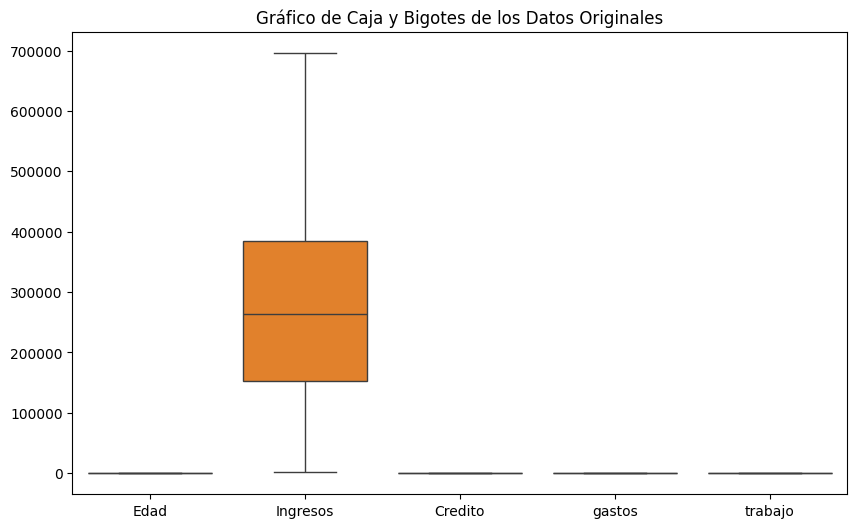

In [8]:
# Seleccionar sólo las columnas numéricas
numerical_data = data[['Edad', 'Ingresos', 'Credito', 'gastos', 'trabajo']]
# Crear el gráfico de caja y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_data)
plt.title('Gráfico de Caja y Bigotes de los Datos Originales')
plt.show()

**Codificar la variable 'Genero' (Male = 0, Female = 1):**


Primero, se codifica la variable categórica 'Genero' (Male = 0, Female = 1) para convertirla en una forma numérica. Luego, se seleccionan las columnas numéricas relevantes para el análisis (Edad, Ingresos, Credito, Gastos, Trabajo, y Genero), y se eliminan las no necesarias, como ID y Ciudad.

A continuación, normalizamos los datos utilizando el StandardScaler de scikit-learn, asegurando que todas las variables tengan la misma escala (media 0 y desviación estándar 1). Esto es crucial para que ninguna variable, como Ingresos, domine las distancias calculadas en el algoritmo K-means. El
resultado es un conjunto de datos listos para ser procesados y segmentados en grupos utilizando técnicas de clustering.

In [9]:
# Codificar la variable 'Genero' (Male = 0, Female = 1)
data['Genero'] = data['Genero'].map({'Male': 0, 'Female': 1})
# Seleccionar las columnas numéricas para la segmentación (eliminando ID y Ciudad)
data_numeric = data[['Edad', 'Ingresos', 'Credito', 'gastos', 'trabajo', 'Genero']]
# Normalizar los datos numéricos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)
# Visualizar las primeras filas de los datos escalados
data_scaled[:5]

array([[ 0.2165087 ,  1.43599311, -0.64203672,  0.95267867, -1.25658588,
        -1.12815215],
       [ 0.83866013, -0.46207437, -0.86251966,  0.42913296, -1.25658588,
        -1.12815215],
       [ 0.52758441, -0.71514273, -1.58148576,  0.63855125,  0.78112095,
         0.88640526],
       [-0.2189973 , -1.3561374 , -0.20107085, -0.72266759, -1.25658588,
         0.88640526],
       [-0.96557902, -0.17149652,  0.70003332, -1.56034072, -1.25658588,
         0.88640526]])

Aplicar el Algoritmo K-means
Para determinar el número óptimo de clústeres, utilizaremos el método del codo.
* Inicialización: se inicializa un ciclo donde se prueba el algoritmo K-means con diferentes números de clústeres, comenzando desde 1 hasta 15 en este caso. Para cada número de clústeres, se calcula la inercia.
* Cálculo de la inercia: para cada valor de 𝑘, k (el número de clústeres), se entrena el modelo Kmeans y se calcula la inercia, que se almacena en una lista llamada inercia.
* Gráfico del codo: luego, se grafica la inercia en función del número de clústeres. En este gráfico, el eje X muestra el número de clústeres (k) y el eje Y muestra el valor de la inercia.
* Interpretación del gráfico: el "codo" en el gráfico es el punto donde la inercia deja de disminuir de manera tan pronunciada y comienza a estabilizarse. Este punto indica el número óptimo de clústeres, ya que añadir más clústeres más allá de este punto no mejora significativamente la calidad del agrupamiento. Según el gráfico obtenido, el número óptimo de clústeres parece ser 11, ya que después de ese punto la disminución de la inercia es menos pronunciada.

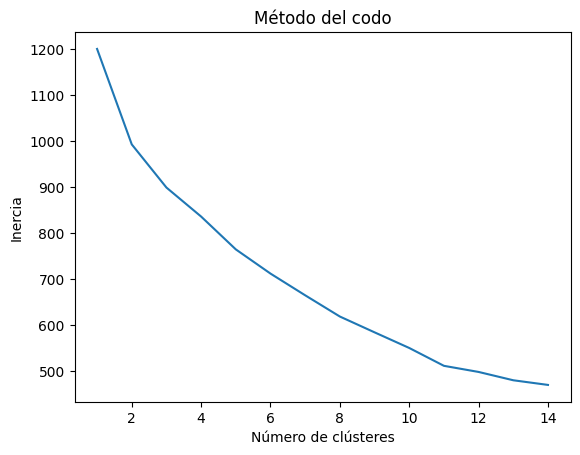

In [14]:
# Método del codo para determinar el número de clústeres óptimo
inertia = []
for k in range(1, 15):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_scaled)
  inertia.append(kmeans.inertia_)
# Graficar el codo
plt.plot(range(1, 15), inertia)
plt.title("Método del codo")
plt.xlabel("Número de clústeres")
plt.ylabel("Inercia")
plt.show()

** Aplicar K-means con el número de clústeres determinado (k=11)
En este bloque de código se lleva a cabo la aplicación del algoritmo K-means con el número de
clústeres determinado previamente (en este caso, 𝑘=11) y se visualizan los resultados obtenidos.

     ID  Genero  Edad      Ingresos  Credito  gastos  Cluster
0  1001       0    49  527547.58850      653      78        3
1  1002       0    59  207143.19760      630      63        4
2  1003       1    54  164423.84570      555      69       10
3  1004       1    42   56220.36443      699      30        9
4  1005       1    30  256194.36190      793       6        6


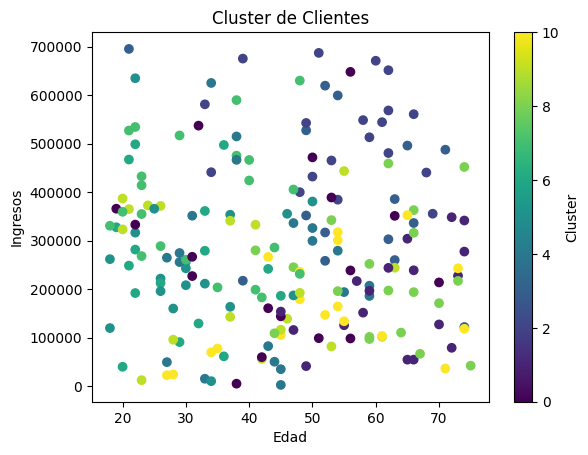

In [16]:
# Aplicar K-means con el número de clústeres determinado (k=11)
kmeans = KMeans(n_clusters=11, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)
# Ver los resultados
print(data[['ID', 'Genero', 'Edad', 'Ingresos', 'Credito', 'gastos', 'Cluster']].head())
# Visualización de los clústeres (utilizando solo 'Edad' e 'Ingresos' para simplificar)
plt.scatter(data['Edad'], data['Ingresos'], c=data['Cluster'], cmap='viridis')
plt.title("Cluster de Clientes")
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.colorbar(label='Cluster')
plt.show()

***Evaluación de los resultados***

Interpretación de los clústeres: una vez que los clientes han sido agrupados en clústeres, podemos
analizar las características promedio de cada grupo para determinar las características comunes.
Por ejemplo, el Clúster 0 podría estar compuesto por clientes jóvenes con ingresos más bajos,
mientras que el Clúster 1 podría agrupar a clientes mayores con ingresos elevados.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        200 non-null    int64  
 1   Genero    200 non-null    int64  
 2   Edad      200 non-null    int64  
 3   Ciudad    200 non-null    object 
 4   Ingresos  200 non-null    float64
 5   Credito   200 non-null    int64  
 6   gastos    200 non-null    int64  
 7   trabajo   200 non-null    int64  
 8   Cluster   200 non-null    int32  
dtypes: float64(1), int32(1), int64(6), object(1)
memory usage: 13.4+ KB


**Analizar las características de cada clúster**

Este bloque de código se utiliza para analizar las características promedio de cada uno de los
clústeres generados por el algoritmo K-means, lo que permite comprender las diferencias entre los
distintos grupos segmentados.
* Agrupación por clústeres: se seleccionan las columnas de interés en el DataFrame (data), que son ID, Género, Edad, Ingresos, Crédito, Gastos, y Clúster.
* Luego, se agrupa el DataFrame por la columna 'Clúster', lo que significa que se organiza el conjunto de datos en 11 grupos, uno para cada clúster.
* Cálculo de las características promedio: después de agrupar los datos por Clúster, se aplica el método mean() para calcular la media de las demás variables numéricas dentro de cada grupo.
* Edad promedio dentro de cada clúster. Ingresos promedio de los clientes en cada grupo. Crédito promedio dentro de cada clúster. Gastos promedio de cada grupo.

In [18]:
cluster_summary = data[['ID', 'Genero', 'Edad', 'Ingresos', 'Credito', 'gastos',
'Cluster']].groupby('Cluster').mean()
print(cluster_summary)

                  ID  Genero       Edad       Ingresos     Credito     gastos
Cluster                                                                      
0        1118.882353     0.0  44.588235  271170.650443  598.117647  52.000000
1        1103.611111     1.0  62.722222  183308.791798  768.222222  41.666667
2        1094.368421     1.0  54.631579  523416.803642  715.789474  44.473684
3        1092.733333     0.0  55.466667  398530.509453  750.266667  81.333333
4        1080.000000     0.0  41.850000  240889.554767  645.550000  39.850000
5        1115.235294     0.0  31.117647  258272.531734  818.176471  48.882353
6        1082.470588     1.0  28.823529  257208.213508  818.235294  20.058824
7        1109.181818     1.0  32.681818  381052.773627  774.818182  83.500000
8        1115.894737     0.0  61.105263  221738.496119  770.789474  25.157895
9        1108.888889     1.0  38.333333  228916.818756  622.222222  36.055556
10       1083.611111     1.0  51.166667  161043.953349  640.2222

*Desglose y análisis por clúster:*


Clúster 0:
* Edad promedio: ~44 años.
* Ingresos promedio: 271,170.
* Gasto promedio: 52.
* Personas predominantemente hombres.
* Representa un grupo con ingresos medianos y gastos moderados.

Clúster 1:
* Edad promedio: ~63 años.
* Ingresos promedio: 183,308.
* Gasto promedio: 41.6.
* Personas predominantemente mujeres.
* Grupo mayor de edad con ingresos bajos y gastos controlados.

Clúster 2:
* Edad promedio: ~55 años.
* Ingresos promedio: 523,416.
* Gasto promedio: 44.4.
* Mayoría mujeres.
* Grupo con ingresos altos y gastos bajos, posiblemente ahorradores.

Clúster 3:
* Edad promedio: ~55 años.
* Ingresos promedio: 398,530.
* Gasto promedio: 81.3.
* Mayoría hombres.
* Grupo con ingresos altos y gastos elevados, estilo de vida más lujoso.

Clúster 4:
* Edad promedio: ~41 años.
* Ingresos promedio: 240,889.
* Gasto promedio: 39.8.
* Personas predominantemente hombres.
* Grupo más joven, ingresos y gastos moderados.

Clúster 5:
* Edad promedio: ~31 años.
* Ingresos promedio: 258,272.
* Gasto promedio: 48.8.
* Mayoría hombres.
* Representa a jóvenes con ingresos y gastos promedio.

ETC....

***Aplicación del Método de Silhouette al Taller***


En el taller, trabajamos con un conjunto de datos de clientes de una tienda. Después de normalizar las variables (Edad, Ingresos, Crédito, etc.) y aplicar el algoritmo K-means para agrupar los datos, utilizamos el método del codo; pero ahora vamos a usar el método silhouette para validar la calidad
de la segmentación.

**Determinación del Número Óptimo de Clústeres**


Calculamos el coeficiente de silhouette para diferentes valores de 𝑘 (número de clústeres). En este caso práctico:
Probamos valores de 𝑘 desde 2 hasta 15.
El 𝑘 que maximiza la media del coeficiente de silhouette entre todas las observaciones se considera el número óptimo de clústeres.

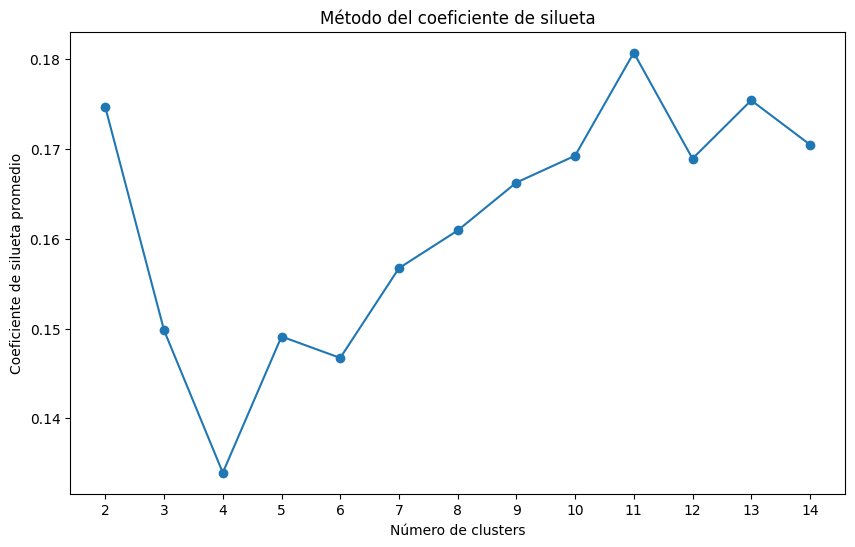

Número óptimo de clusters: 11


In [21]:
from sklearn.metrics import silhouette_score
# Definir el rango de posibles números de clústeres
range_clusters = range(2, 15)
# Lista para almacenar las puntuaciones de silueta
silhouette_scores = []
# Calcular el coeficiente de silueta para cada número de clústeres
for k in range_clusters:
  kmeans = KMeans(n_clusters=k, random_state=42)
  cluster_labels = kmeans.fit_predict(data_scaled)
  silhouette_avg = silhouette_score(data_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)
# Graficar el promedio del coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title("Método del coeficiente de silueta")
plt.xlabel("Número de clusters")
plt.ylabel("Coeficiente de silueta promedio")
plt.xticks(range_clusters)
plt.show()

# Número óptimo de clústeres basado en el máximo valor del coeficiente de silueta
optimal_clusters = range_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Número óptimo de clusters: {optimal_clusters}")

En el método del Coeficiente de Silueta, se toma el valor más alto del coeficiente promedio para determinar el número óptimo de clústeres, en este caso sería 11.

El razonamiento detrás de esto es que un valor de silueta cercano a 1 indica que los puntos están bien agrupados dentro de su clúster y bien separados de los demás clústeres. Por tanto:

**Silhouette cercano a 1:** buena asignación al clúster correcto.

**Silhouette cercano a 0:** los puntos están en los límites entre clústeres.

**Silhouette negativo (< 0):** mala asignación, el punto pertenece más al clúster vecino. El número de clústeres que maximiza el promedio del coeficiente de silueta (considerando todas las observaciones) es considerado el número
óptimo.

Así el agrupamiento más recomendable sería 11.